# Package

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


# Data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


60,000 items are stored 28 by 28.

In [4]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


The class names are not included in the dataset, so we need to make a list of the class names.

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Data preprocessing

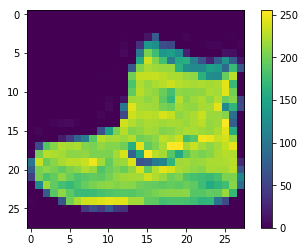

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

The pixel values fall in the range of 0 to 255.

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

With the below code, we can display each item from train_images and train_labels data. Get class number from train_labels, and use the number to get the class names from class_names.

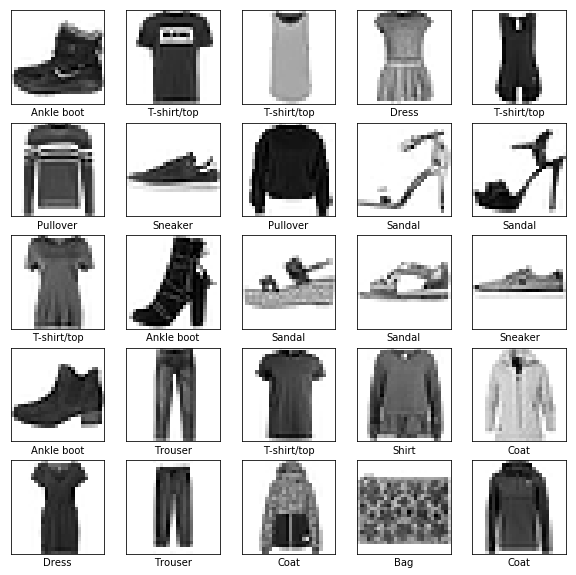

In [9]:
plt.figure(figsize = (10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

# Model

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


By Flatten, we can transform 28 by 28 to 784 1d-array (28*28)

# Model compile

In compile step, we add loss function, optimizer and metrics. Metrics is used to monitor the training and testing steps.

In [11]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

# Model training

In [12]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 7s 124us/sample - loss: 0.5010 - acc: 0.8227
Epoch 2/5
60000/60000 [==============================] - 8s 128us/sample - loss: 0.3745 - acc: 0.8647
Epoch 3/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3370 - acc: 0.8766
Epoch 4/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3133 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2957 - acc: 0.8911


Check the last right column. It shows the model reaches an accuracy of 89% on the "training data".

# Testing data accuracy

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 59us/sample - loss: 0.3473 - acc: 0.8778
Test accuracy: 0.8778


Test accuracy is 88%. Test data accuracy is a little less than the training data accuracy due to overfitting.

# Prediction

In [14]:
predictions = model.predict(test_images)

np.round(predictions[0], decimals = 3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.003, 0.   , 0.013, 0.   ,
       0.984], dtype=float32)

Predictions return the "confidence" of the model that the image corresponds to each of the 10 different clothing. From the below code, we can know the prediction is correct.

In [15]:
print(np.argmax(predictions[0]))
print(test_labels[0])

9
9


# Visualize predictions

Show image and predicted label. If correct, blue, if not, red.

In [19]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100 * np.max(predictions_array),
                                        class_names[true_label]),
               color = color)

Because first set color red and then set blue, if you make a correct prediction, color is re-updated by blue, and red doesn't showup. 

In [17]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

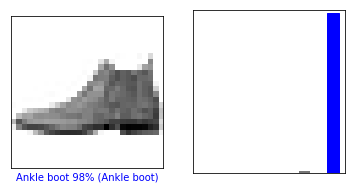

In [20]:
i = 0
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

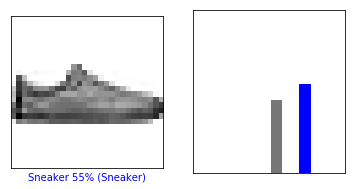

In [21]:
i = 12
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

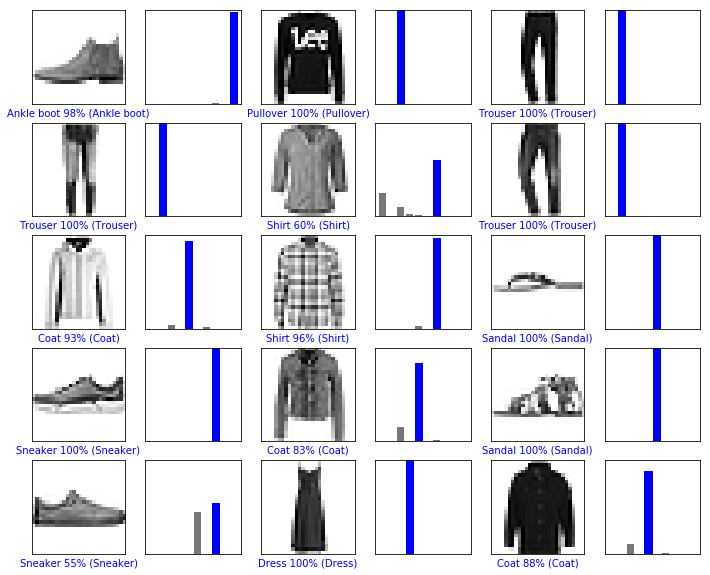

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize = (2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)

plt.show()

Manually make a prediction by using trained model to test data.

In [24]:
img = test_images[0]
print(img.shape)
# expand the shape of array
img = np.expand_dims(img, 0)
print(img.shape)

predictions_single = model.predict(img)
print(np.round(predictions_single, decimals = 3))

(28, 28)
(1, 28, 28)
[[0.    0.    0.    0.    0.    0.003 0.    0.013 0.    0.984]]


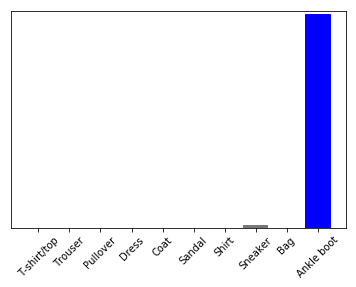

In [25]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation = 45)
plt.show()

In [31]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)
print(class_names[prediction_result])

9
Ankle boot
